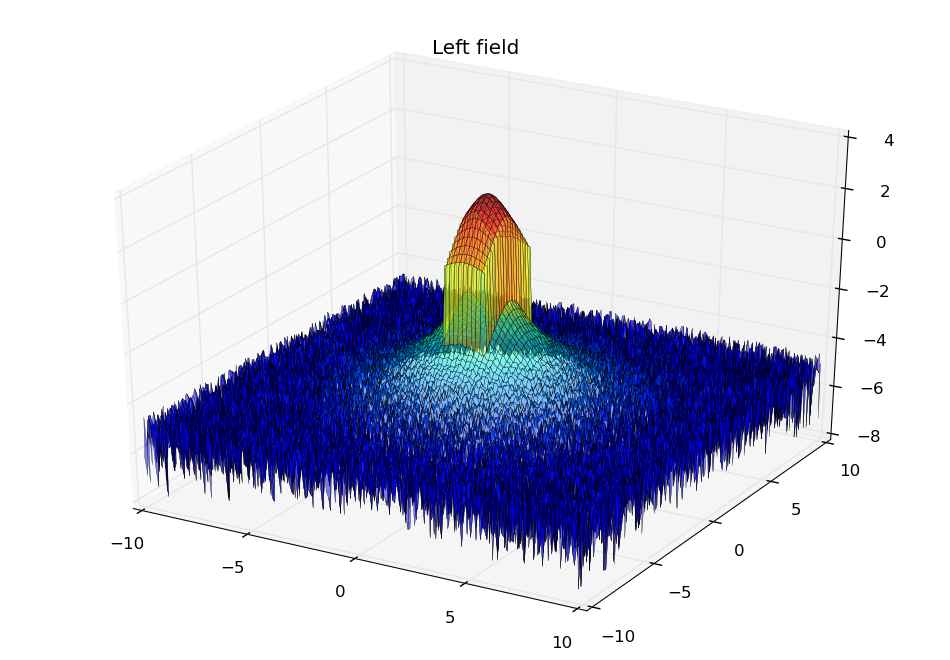

40401


PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7fa249515cd0>

In [2]:
using PyPlot

# sampling
x = -10:.1:10
y = -10:.1:10
n = length(x)
xn = yn = n

println(xn*yn)

xgrid = repmat(x, 1, xn)';
ygrid = repmat(y, 1, yn);

type Antenna
    x::Float64
    y::Float64
end

# 
#          _
#          |
#      X1-X4--X2
#          |
#         X3
#

antennas = Antenna[]
push!(antennas, Antenna(0, 0))

N_inputs = length(antennas)

# field + noise
field(a, x, y) = 1./(((x.-antennas[a].x).^2 .+ (y.-antennas[a].y).^2 + 1).^(3/2))

# dump
tg(x, y) = ((abs(x).<1) & (abs(y).<2))

field_dump(a, x, y) = e.^(3*(a<4)*tg(x,y) + 3*(a>=4)*(!tg(x,y)))

# result
flogv(a, x, y) = log(field(a, x, y).*field_dump(a, x, y) .+ 0.01*rand(size(x)))

fig = figure("An example", figsize=(12,8));
title("Field simulation")

ax = fig[:add_subplot](1, 1, 1, projection = "3d");
title("Left field")
z = flogv(1, xgrid, ygrid)
ax[:plot_surface](xgrid, ygrid, z, rstride=2, cstride=2, cmap=ColorMap("jet"), alpha=0.5, linewidth=0.2)

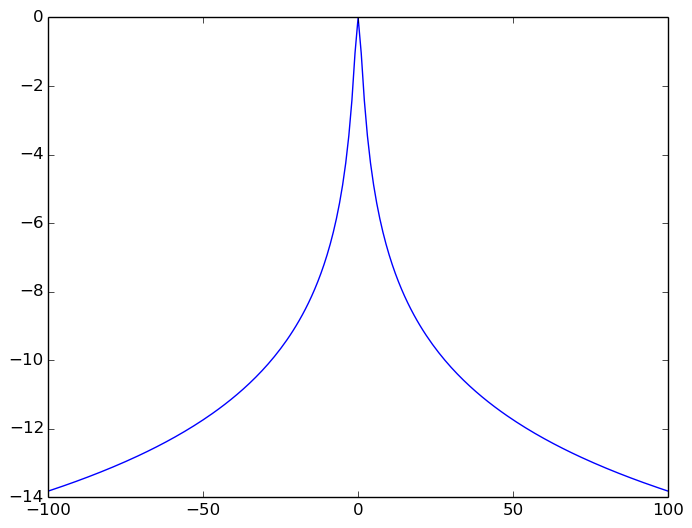

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa248dc6610>

In [3]:
x = -100:1:100
f = log(1./((x.^2+1).^(3/2)) .+ 0.01*rand(length(x)))
plot(x,f)

In [2]:
rand(length(x),length(x))

201×201 Array{Float64,2}:
 0.700204   0.89264     0.237811   …  0.836778    0.508482   0.926874  
 0.548465   0.257028    0.509127      0.939576    0.677607   0.348177  
 0.968926   0.470791    0.518571      0.456144    0.636825   0.614194  
 0.553021   0.650551    0.433751      0.419773    0.637714   0.434183  
 0.961831   0.425759    0.748163      0.56781     0.0997227  0.0439846 
 0.0685028  0.152716    0.521977   …  0.776653    0.456017   0.556323  
 0.0684777  0.496493    0.204736      0.446158    0.920928   0.262959  
 0.320988   0.69752     0.0855436     0.235012    0.358427   0.761224  
 0.590454   0.0943666   0.160585      0.92591     0.687495   0.360941  
 0.476011   0.849999    0.0423148     0.435473    0.504827   0.961939  
 0.261432   0.378171    0.696103   …  0.165377    0.37513    0.668444  
 0.797092   0.0327516   0.66931       0.0472251   0.219168   0.920194  
 0.738976   0.107218    0.830872      0.00912916  0.291002   0.529574  
 ⋮                                 ⋱  

In [3]:
size(xgrid)

(201,201)